In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
data = pd.read_csv("/content/finance_economics_dataset.csv")
data

,Date,Stock Index,Open Price,Close Price,Daily High,Daily Low,Trading Volume,GDP Growth (%),Inflation Rate (%),Unemployment Rate (%),...,Forex USD/EUR,Forex USD/JPY,Crude Oil Price (USD per Barrel),Gold Price (USD per Ounce),Real Estate Index,Retail Sales (Billion USD),Bankruptcy Rate (%),Mergers & Acquisitions Deals,Venture Capital Funding (Billion USD),Consumer Spending (Billion USD)
0,2000-01-01,Dow Jones,2128.75,2138.48,2143.70,2100.55,2670411,-0.37,6.06,6.10,...,1.04,119.87,47.20,1052.34,390.23,2229,2.12,3,76.64,4589
1,2000-01-02,S&P 500,2046.82,2036.18,2082.83,2009.53,690220415,3.19,4.95,6.62,...,1.00,98.22,52.84,1957.73,346.23,4156,1.40,21,5.67,10101
2,2000-01-03,Dow Jones,1987.92,1985.26,2022.28,1978.37,315284661,5.54,9.13,2.60,...,0.83,80.13,78.80,2339.49,439.46,340,0.79,48,39.43,13665
3,2000-01-04,Dow Jones,4625.02,4660.47,4665.26,4595.46,13098297,10.00,3.77,2.20,...,0.95,149.15,28.18,1308.54,213.07,8456,4.22,16,12.83,5192
4,2000-01-05,S&P 500,1998.18,1982.18,2044.31,1966.44,385306746,1.53,2.20,8.20,...,1.43,113.71,92.20,2210.08,405.49,1596,2.21,34,86.37,10688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2008-03-14,Dow Jones,1273.76,1235.44,1317.28,1192.34,86910001,8.84,7.00,10.44,...,1.18,113.52,61.98,2385.41,298.72,3033,8.75,35,66.01,2200
2996,2008-03-15,S&P 500,4589.59,4566.91,4607.56,4545.69,303579301,-1.88,9.15,5.61,...,1.17,147.10,31.61,2147.13,143.43,7950,5.07,18,25.49,5261
2997,2008-03-16,S&P 500,1477.52,1448.47,1523.86,1402.69,442387176,4.07,0.88,8.91,...,1.02,81.99,45.64,1943.61,105.81,3894,5.78,4,14.29,12039
2998,2008-03-17,NASDAQ,2311.37,2306.90,2346.30,2282.00,523425925,1.06,8.61,10.15,...,1.49,86.42,123.25,2211.40,236.07,2543,2.35,22,94.34,11979


In [54]:
# 1. What is the shape of the dataset?

data.shape

(3000, 24)

In [55]:
# 2. What are the column names and their data types?

data.columns
data.dtypes

,0
Date,object
Stock Index,object
Open Price,float64
Close Price,float64
Daily High,float64
Daily Low,float64
Trading Volume,int64
GDP Growth (%),float64
Inflation Rate (%),float64
Unemployment Rate (%),float64


In [56]:
# 3. How many unique stock indices are there?

data['Stock Index'].nunique()

3

In [57]:
# 4. What is the date range of the dataset?

print("Max range : ",data['Date'].max())
print("Min range : ",data['Date'].min())

Max range :  2008-03-18
Min range :  2000-01-01


In [58]:
# 5. Are there any missing values?

data.isnull().sum()

,0
Date,0
Stock Index,0
Open Price,0
Close Price,0
Daily High,0
Daily Low,0
Trading Volume,0
GDP Growth (%),0
Inflation Rate (%),0
Unemployment Rate (%),0


In [59]:
# 6. Are there negative values in columns that should be non-negative?

data[['GDP Growth (%)']].min()<0

,0
GDP Growth (%),True


In [60]:
# 7. What is the summary of GDP Growth (%)?

data['GDP Growth (%)'].describe()

,GDP Growth (%)
count,3000.000000
mean,2.608903
std,4.287337
min,-5.000000
25%,-1.012500
50%,2.725000
75%,6.242500
max,10.000000


In [61]:
# 8. Are there rows with zero or near-zero trading volume?

data[data['Trading Volume'] == 0].sum()

,0
Date,0
Stock Index,0
Open Price,0.0
Close Price,0.0
Daily High,0.0
Daily Low,0.0
Trading Volume,0
GDP Growth (%),0.0
Inflation Rate (%),0.0
Unemployment Rate (%),0.0


In [62]:
# 9. Are there any duplicate rows?

data.duplicated().sum()

np.int64(0)

In [63]:
# 10. Are there outliers in GDP, Gold, or Oil prices?

data.describe()

,Open Price,Close Price,Daily High,Daily Low,Trading Volume,GDP Growth (%),Inflation Rate (%),Unemployment Rate (%),Interest Rate (%),Consumer Confidence Index,...,Forex USD/EUR,Forex USD/JPY,Crude Oil Price (USD per Barrel),Gold Price (USD per Ounce),Real Estate Index,Retail Sales (Billion USD),Bankruptcy Rate (%),Mergers & Acquisitions Deals,Venture Capital Funding (Billion USD),Consumer Spending (Billion USD)
count,3000.000000,3000.000000,3000.000000,3000.00000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,2982.094607,2981.249173,3018.887777,2944.32975,5.033864e+08,2.608903,5.096830,8.663787,5.218237,85.036000,...,1.146113,115.115233,85.539953,1655.167877,300.554457,5099.546667,5.007413,24.598667,49.955197,7551.278000
std,1151.862689,1151.783841,1151.683485,1151.83490,2.859004e+08,4.287337,2.910513,3.737536,2.726115,20.224829,...,0.201128,20.111351,37.847063,492.177706,114.601328,2898.714108,2.866466,14.301344,28.722592,4203.705678
min,1000.050000,954.520000,1012.130000,917.17000,1.636024e+06,-5.000000,0.010000,2.000000,0.500000,50.000000,...,0.800000,80.010000,20.040000,800.160000,100.130000,107.000000,0.010000,0.000000,0.100000,101.000000
25%,1994.982500,1997.425000,2035.952500,1955.39750,2.545224e+08,-1.012500,2.607500,5.450000,2.890000,68.000000,...,0.980000,98.267500,52.590000,1226.737500,202.370000,2503.750000,2.570000,12.000000,25.762500,3950.750000
50%,2970.780000,2977.180000,3006.520000,2939.24500,5.033710e+08,2.725000,5.110000,8.710000,5.250000,86.000000,...,1.140000,114.795000,85.080000,1666.060000,299.885000,5123.500000,5.060000,25.000000,49.840000,7610.000000
75%,3974.690000,3982.082500,4015.217500,3934.08750,7.537963e+08,6.242500,7.600000,11.882500,7.492500,103.000000,...,1.320000,132.455000,119.150000,2080.730000,399.137500,7616.250000,7.482500,37.000000,74.825000,11148.750000
max,4998.230000,5034.130000,5076.190000,4977.06000,9.999771e+08,10.000000,10.000000,15.000000,10.000000,119.000000,...,1.500000,149.960000,149.870000,2499.660000,499.920000,9998.000000,10.000000,49.000000,99.990000,14990.000000


In [64]:
# 11. What is the summary of Inflation Rate (%)?

data['Inflation Rate (%)'].describe()

,Inflation Rate (%)
count,3000.000000
mean,5.096830
std,2.910513
min,0.010000
25%,2.607500
50%,5.110000
75%,7.600000
max,10.000000


In [65]:
# 12. What is the average unemployment rate?

data['Unemployment Rate (%)'].mean()

np.float64(8.663786666666667)

In [66]:
# 13. Which index has the highest trading volume?

data.groupby('Stock Index')['Trading Volume'].mean().idxmax()

'S&P 500'

In [67]:
# 14. How many stock records are from each index?

data['Stock Index'].value_counts()

,count
Stock Index,
S&P 500,1036
NASDAQ,1007
Dow Jones,957


In [68]:
# 15. What is the correlation between inflation and interest rate?

data['Inflation Rate (%)'].corr(data['Interest Rate (%)'])

np.float64(0.00573292723557624)

In [69]:
# 16. What is the average Consumer Confidence Index?

data['Consumer Confidence Index'].mean()

np.float64(85.036)

In [70]:
# 17. Which column has the highest standard deviation?

data.describe().loc['std'].idxmax()

'Trading Volume'

In [71]:
# 18. What is the highest gold price recorded?

data['Gold Price (USD per Ounce)'].max()

2499.66

In [72]:
# 19. Which date had the highest crude oil price?

data.loc[data['Crude Oil Price (USD per Barrel)'].idxmax()]['Date']

'2001-11-22'

In [73]:
# 20. What is the average corporate profit?

data['Corporate Profits (Billion USD)'].mean()

np.float64(2553.7563333333333)

In [74]:
# 21. What percentage of the dataset shows negative GDP growth?

(data['GDP Growth (%)'] < 0).mean() * 100

np.float64(31.566666666666666)

In [75]:
# 22. Does high inflation correspond to higher interest rates?

data['Inflation Rate (%)'].corr(data['Interest Rate (%)'])

np.float64(0.00573292723557624)

In [76]:
# 23. Is there a relationship between unemployment and consumer spending?

data.groupby('Unemployment Rate (%)')['Consumer Spending (Billion USD)'].mean()


,Consumer Spending (Billion USD)
Unemployment Rate (%),
2.00,9770.500000
2.01,5852.333333
2.02,2370.500000
2.03,13234.000000
2.04,9369.000000
...,...
14.95,10968.666667
14.96,9048.285714
14.97,8535.600000


In [77]:
# 24. Do higher corporate profits align with higher consumer confidence?

data.groupby('Corporate Profits (Billion USD)')['Consumer Confidence Index'].mean()

,Consumer Confidence Index
Corporate Profits (Billion USD),
100,51.0
102,53.0
105,62.0
109,87.0
110,73.0
...,...
4991,87.5
4993,55.0
4994,74.0


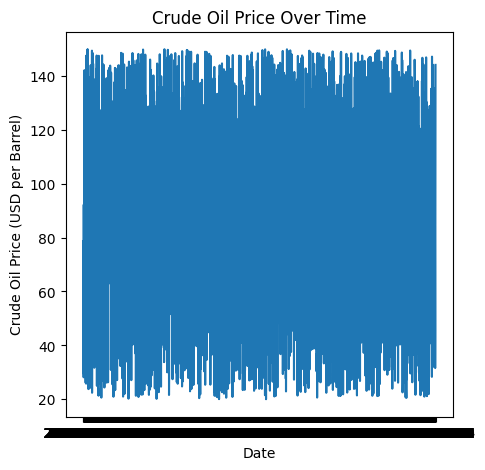

In [78]:
# 25. What’s the trend of crude oil prices over time?

plt.figure(figsize=(5,5))
sns.lineplot(data=data, x='Date', y='Crude Oil Price (USD per Barrel)')
plt.title("Crude Oil Price Over Time")
plt.show()

In [79]:
# 26. Are gold prices inversely related to stock performance?

data.groupby('Stock Index')['Gold Price (USD per Ounce)'].mean()

,Gold Price (USD per Ounce)
Stock Index,
Dow Jones,1649.041003
NASDAQ,1656.103863
S&P 500,1659.917761


In [80]:
# 27. Does government debt impact consumer confidence?

data.groupby('Government Debt (Billion USD)')['Consumer Confidence Index'].mean()

,Consumer Confidence Index
Government Debt (Billion USD),
503,55.0
509,71.0
510,87.0
519,83.0
529,73.0
...,...
29962,92.0
29972,101.0
29981,93.0


In [81]:
# 28. How do mergers & acquisitions (M&A) activity correlate with stock index closing prices?

data.groupby('Stock Index').apply(lambda x: x['Mergers & Acquisitions Deals'].corr(x['Close Price']))

/tmp/ipython-input-2610443122.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data.groupby('Stock Index').apply(lambda x: x['Mergers & Acquisitions Deals'].corr(x['Close Price']))


,0
Stock Index,
Dow Jones,-0.000103
NASDAQ,-0.002992
S&P 500,0.010619


In [82]:
# 29. Is retail sales growth associated with GDP growth?

data.groupby('Retail Sales (Billion USD)')['GDP Growth (%)'].mean()

,GDP Growth (%)
Retail Sales (Billion USD),
107,9.12
109,1.93
113,4.12
118,9.82
120,-0.98
...,...
9976,2.27
9982,-1.20
9988,3.16


In [83]:
# 30. Is stock market performance linked to consumer spending?

data.groupby('Consumer Spending (Billion USD)')['Close Price'].mean()


,Close Price
Consumer Spending (Billion USD),
101,2143.09
104,4066.48
117,1574.57
132,1426.74
133,2818.62
...,...
14941,3780.25
14944,1623.57
14946,1130.75


In [84]:
# 31. Which stock index had the highest average closing price?

data.groupby('Stock Index')['Close Price'].mean().idxmax()

'Dow Jones'

In [85]:
# 32. What is the relationship between interest rate and unemployment?

data.groupby('Interest Rate (%)')['Unemployment Rate (%)'].mean()

,Unemployment Rate (%)
Interest Rate (%),
0.50,7.5060
0.51,8.2500
0.53,6.8600
0.54,9.4600
0.55,12.5700
...,...
9.96,7.1000
9.97,2.3600
9.98,9.6700


In [86]:
# 33. Do lower consumer confidence values coincide with higher bankruptcy rates?

data.groupby('Consumer Confidence Index')['Bankruptcy Rate (%)'].mean()


,Bankruptcy Rate (%)
Consumer Confidence Index,
50,5.275385
51,4.607273
52,5.380256
53,4.897400
54,5.192400
...,...
115,5.166275
116,4.826667
117,4.567027


In [87]:
# 34. Which indicator has the highest correlation with stock close price?

data.corr(numeric_only=True)['Close Price'].drop('Close Price').idxmax()

'Daily High'

In [88]:
# 35. Are unemployment rates lower when corporate profits are high?

data.groupby('Unemployment Rate (%)')['Corporate Profits (Billion USD)'].mean()

,Corporate Profits (Billion USD)
Unemployment Rate (%),
2.00,2954.500000
2.01,3706.000000
2.02,3650.000000
2.03,2747.500000
2.04,3098.500000
...,...
14.95,3047.333333
14.96,2584.857143
14.97,2667.000000
